In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('publications.csv')
df.head()

,Name,Web of Science Documents,Times Cited,Collab-CNCI,Rank,% Docs Cited,Category Normalized Citation Impact,% Documents in Top 1%,% Documents in Top 10%,Documents in Top 1%,Documents in Top 10%,year
0,SWITZERLAND,24154,2705248,0.946748,8,97.93,1.024815,0.89,10.87,97,230,2023
1,CHINA,2185,157320,1.575928,44,99.60,0.900623,2.98,19.26,323,121,2014
2,CHINA,6896,744768,1.032983,42,95.23,1.679004,1.08,11.36,455,662,2013
3,UNITED KINGDOM,2399,177526,1.586585,3,99.21,1.444246,1.63,10.20,98,2463,2005
4,ITALY,10753,301084,0.812773,2,98.35,1.252122,0.81,17.43,440,134,2004


In [3]:
df.describe()

,Web of Science Documents,Times Cited,Collab-CNCI,Rank,% Docs Cited,Category Normalized Citation Impact,% Documents in Top 1%,% Documents in Top 10%,Documents in Top 1%,Documents in Top 10%,year
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,14861.699000,1.296497e+06,1.214932,24.722000,97.410690,1.291637,1.76760,17.58979,261.327000,1497.457000,2013.860000
std,8390.150609,9.670633e+05,0.230261,14.108145,1.419199,0.234461,0.71711,4.36310,136.904576,844.902713,6.748477
min,512.000000,2.184600e+04,0.800182,1.000000,95.000000,0.900623,0.50000,10.02000,12.000000,111.000000,2003.000000
25%,7616.750000,5.076700e+05,1.029402,12.000000,96.150000,1.087020,1.13000,13.77000,142.000000,736.750000,2008.000000
50%,14711.000000,1.064920e+06,1.214383,25.000000,97.385000,1.292028,1.81000,17.39000,261.500000,1481.000000,2014.000000
75%,22022.250000,1.899791e+06,1.415986,37.000000,98.652500,1.499628,2.39000,21.64000,382.000000,2202.250000,2020.000000
max,29959.000000,4.327668e+06,1.599646,49.000000,99.890000,1.698257,3.00000,24.99000,499.000000,2999.000000,2025.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 1000 non-null   object 
 1   Web of Science Documents             1000 non-null   int64  
 2   Times Cited                          1000 non-null   int64  
 3   Collab-CNCI                          1000 non-null   float64
 4   Rank                                 1000 non-null   int64  
 5   % Docs Cited                         1000 non-null   float64
 6   Category Normalized Citation Impact  1000 non-null   float64
 7   % Documents in Top 1%                1000 non-null   float64
 8   % Documents in Top 10%               1000 non-null   float64
 9   Documents in Top 1%                  1000 non-null   int64  
 10  Documents in Top 10%                 1000 non-null   int64  
 11  year                           

In [5]:
df.shape

(1000, 12)

In [6]:
df.isnull().sum()

Name                                   0
Web of Science Documents               0
Times Cited                            0
Collab-CNCI                            0
Rank                                   0
% Docs Cited                           0
Category Normalized Citation Impact    0
% Documents in Top 1%                  0
% Documents in Top 10%                 0
Documents in Top 1%                    0
Documents in Top 10%                   0
year                                   0
dtype: int64

In [7]:
country = sorted(df['Name'].unique())
country 

['AUSTRALIA',
 'BRAZIL',
 'CANADA',
 'CHINA',
 'ENGLAND',
 'FRANCE',
 'GERMANY',
 'INDIA',
 'ITALY',
 'JAPAN',
 'NETHERLANDS',
 'SOUTH KOREA',
 'SPAIN',
 'SWEDEN',
 'SWITZERLAND',
 'UNITED KINGDOM',
 'USA']

In [8]:
# england and united kingdom two different name appeared 
uk_variants = ['ENGLAND']
df['Name'] = df['Name'].replace(uk_variants, 'UNITED KINGDOM')

In [9]:
df['Name'].unique()

array(['SWITZERLAND', 'CHINA', 'UNITED KINGDOM', 'ITALY', 'SPAIN',
       'AUSTRALIA', 'BRAZIL', 'INDIA', 'CANADA', 'SOUTH KOREA', 'SWEDEN',
       'GERMANY', 'FRANCE', 'JAPAN', 'USA', 'NETHERLANDS'], dtype=object)

# univarient analysis

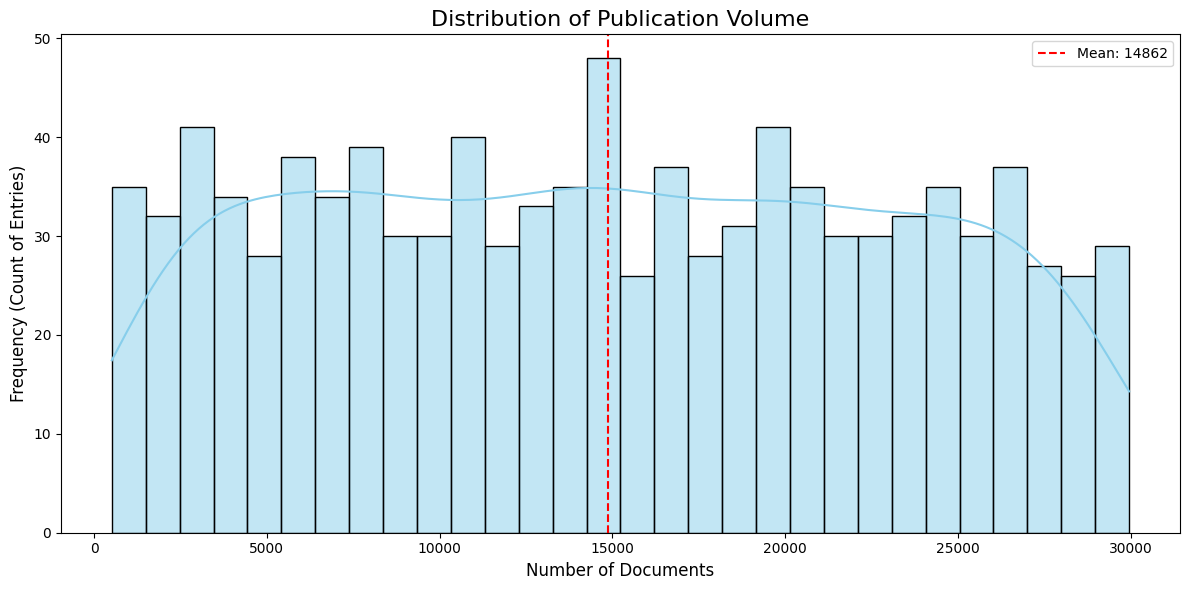

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution of Publication Volume
#Insight: Are most countries large or small producers?
plt.figure(figsize=(12, 6))
sns.histplot(df['Web of Science Documents'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Publication Volume', fontsize=16)
plt.xlabel('Number of Documents', fontsize=12)
plt.ylabel('Frequency (Count of Entries)', fontsize=12)
plt.axvline(df['Web of Science Documents'].mean(), color='red', linestyle='--', label=f"Mean: {df['Web of Science Documents'].mean():.0f}")
plt.legend()
plt.tight_layout()
plt.show()

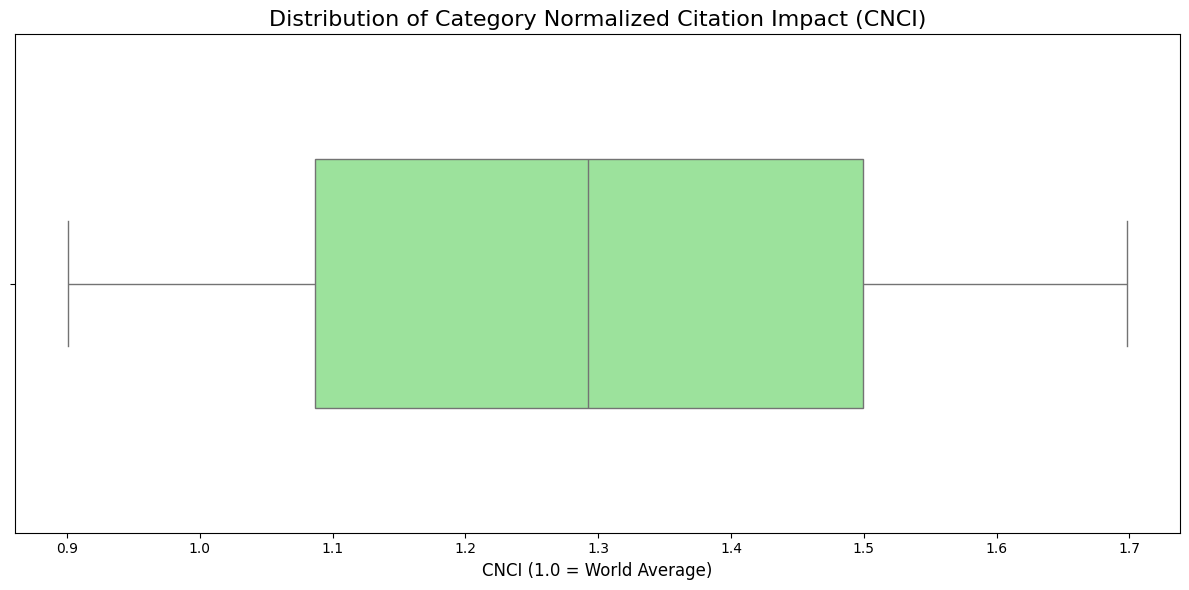

In [11]:
#Distribution of Research Quality(CNCI)
#Insight: What is the "normal" range for citation impact? (Global baseline is usually 1.0)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Category Normalized Citation Impact'], color='lightgreen', width=0.5)
plt.title('Distribution of Category Normalized Citation Impact (CNCI)', fontsize=16)
plt.xlabel('CNCI (1.0 = World Average)', fontsize=12)
plt.tight_layout()
plt.show()

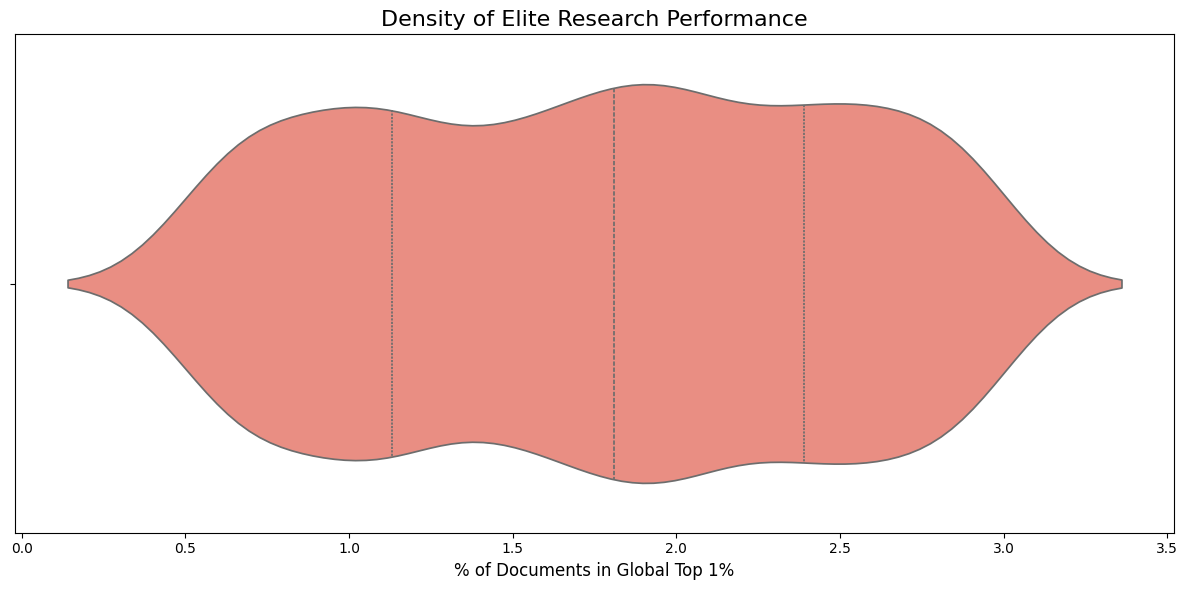

In [12]:
#Elite Research Outliers
#Insight: How rare is it to have a high percentage of Top 1% papers?
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['% Documents in Top 1%'], color='salmon', inner='quartile')
plt.title('Density of Elite Research Performance', fontsize=16)
plt.xlabel('% of Documents in Global Top 1%', fontsize=12)
plt.tight_layout()
plt.show()

# Bivariate Analysis

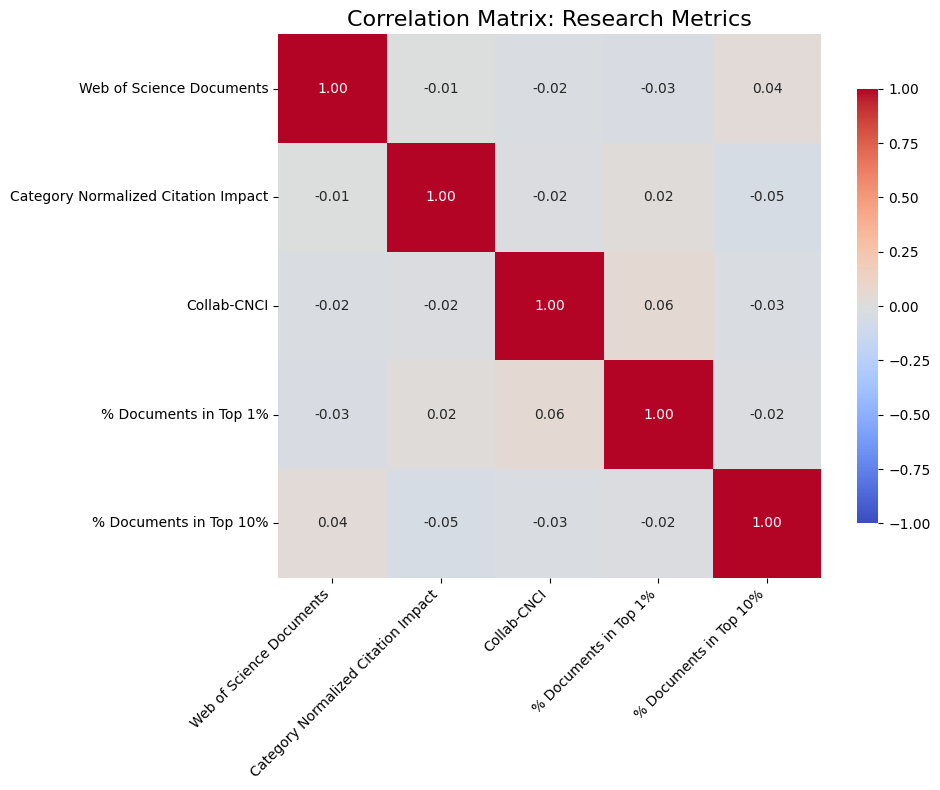

In [13]:
#Correlation Heatmap
#Insight: Which metrics move together?
cols_of_interest = [
    'Web of Science Documents', 
    'Category Normalized Citation Impact', 
    'Collab-CNCI', 
    '% Documents in Top 1%', 
    '% Documents in Top 10%'
]
corr_matrix = df[cols_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Research Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

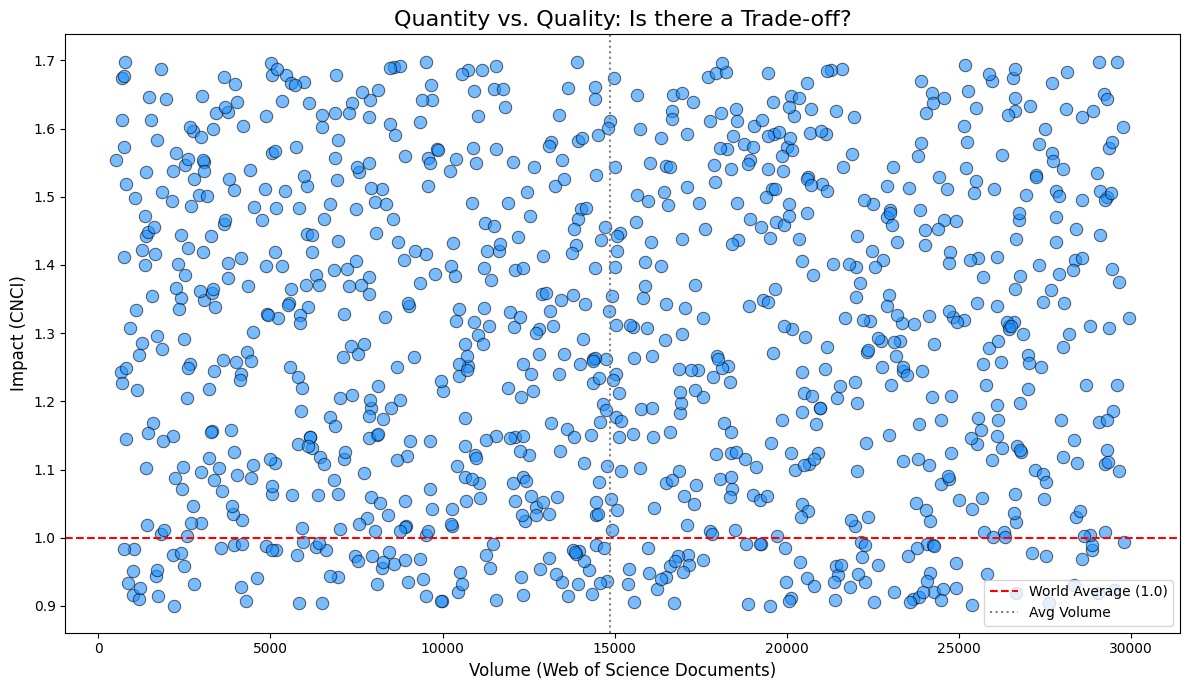

In [14]:
#The Quantity-Quality Trade-off
#Insight: Does publishing more lead to lower average quality?
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Web of Science Documents', y='Category Normalized Citation Impact', 
                alpha=0.6, color='dodgerblue', edgecolor='k', s=80)
plt.title('Quantity vs. Quality: Is there a Trade-off?', fontsize=16)
plt.xlabel('Volume (Web of Science Documents)', fontsize=12)
plt.ylabel('Impact (CNCI)', fontsize=12)
plt.axhline(1.0, color='red', linestyle='--', linewidth=1.5, label='World Average (1.0)')
plt.axvline(df['Web of Science Documents'].mean(), color='grey', linestyle=':', label='Avg Volume')
plt.legend()
plt.tight_layout()
plt.show()


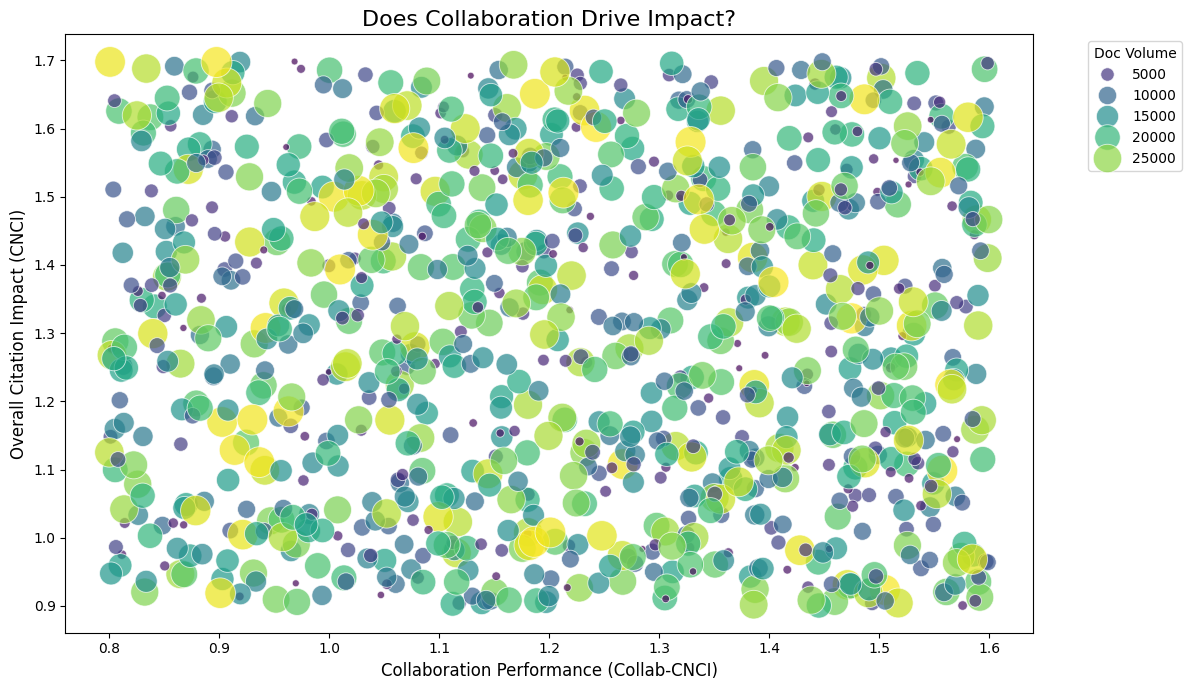

In [15]:
#Impact of Collaboration
# Insight: Does higher collaboration score (Collab-CNCI) correlate with higher overall impact?
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(data=df, x='Collab-CNCI', y='Category Normalized Citation Impact', 
                          size='Web of Science Documents', sizes=(20, 500), 
                          hue='Web of Science Documents', palette='viridis', alpha=0.7)
plt.title('Does Collaboration Drive Impact?', fontsize=16)
plt.xlabel('Collaboration Performance (Collab-CNCI)', fontsize=12)
plt.ylabel('Overall Citation Impact (CNCI)', fontsize=12)
plt.legend(title='Doc Volume', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

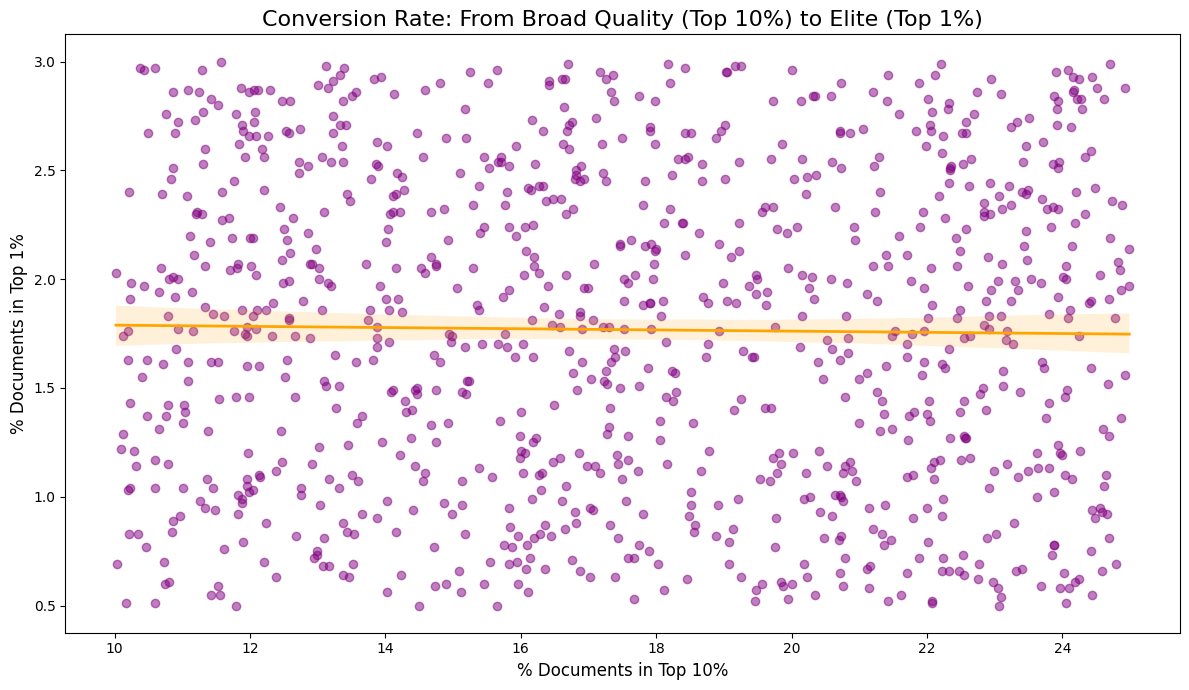

In [16]:
#Broad vs. Elite Excellence
# Insight: Is the "Top 10%" a good predictor for the "Top 1%"?
plt.figure(figsize=(12, 7))
sns.regplot(data=df, x='% Documents in Top 10%', y='% Documents in Top 1%', 
            scatter_kws={'alpha':0.5, 'color':'purple'}, line_kws={'color':'orange', 'linewidth':2})
plt.title('Conversion Rate: From Broad Quality (Top 10%) to Elite (Top 1%)', fontsize=16)
plt.xlabel('% Documents in Top 10%', fontsize=12)
plt.ylabel('% Documents in Top 1%', fontsize=12)
plt.tight_layout()
plt.show()

# Temporal Analysis

C:\Users\lalup\AppData\Local\Temp\ipykernel_15544\1331103657.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_trends = df.groupby(['Name', 'year']).apply(weighted_agg).reset_index()


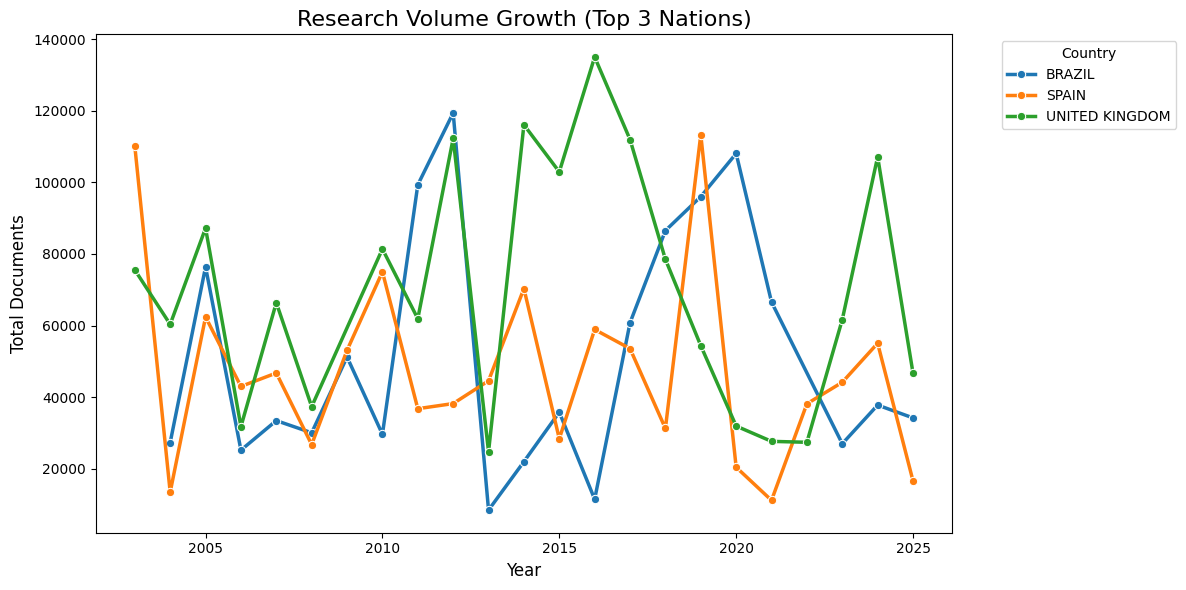

In [17]:
def weighted_agg(x):
    total_docs = x['Web of Science Documents'].sum()
    avg_cnci = np.average(x['Category Normalized Citation Impact'], weights=x['Web of Science Documents'])
    avg_top1 = np.average(x['% Documents in Top 1%'], weights=x['Web of Science Documents'])
    
    return pd.Series({
        'Web of Science Documents': total_docs,
        'Avg CNCI': avg_cnci,
        'Avg Top 1%': avg_top1
    })
df_trends = df.groupby(['Name', 'year']).apply(weighted_agg).reset_index()

#Filter for Top 3 Countries(to keep charts readable)
top_countries = df_trends.groupby('Name')['Web of Science Documents'].sum().sort_values(ascending=False).head(3).index.tolist()
df_plot = df_trends[df_trends['Name'].isin(top_countries)]

#Volume Growth (Quantity)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='year', y='Web of Science Documents', hue='Name', marker='o', linewidth=2.5)
plt.title('Research Volume Growth (Top 3 Nations)', fontsize=16)
plt.ylabel('Total Documents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()
plt.show()


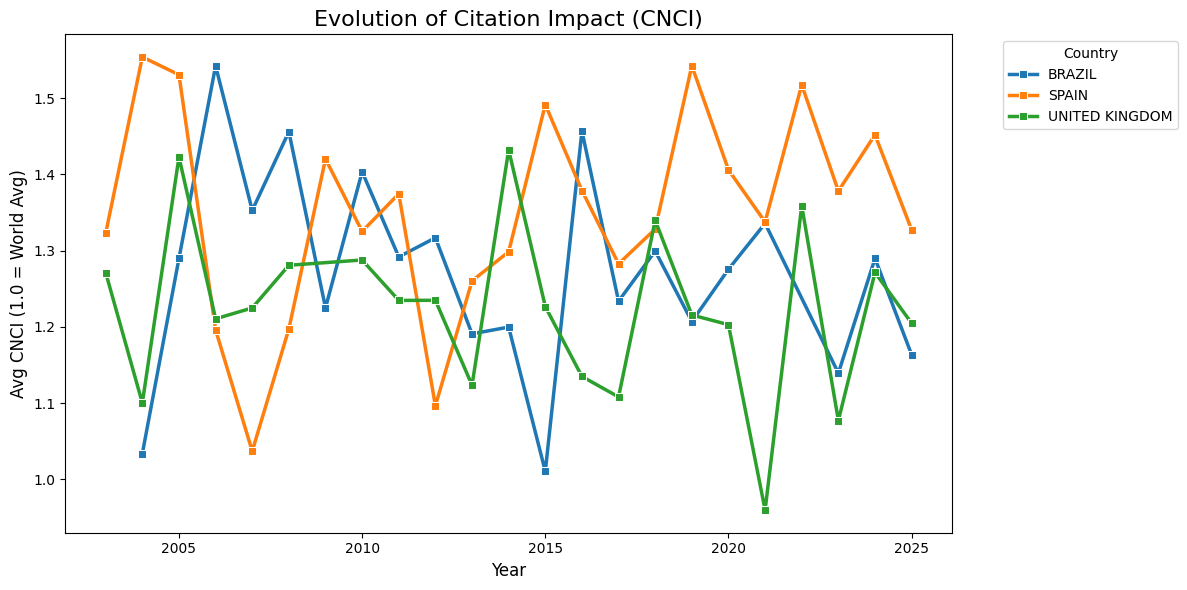

In [18]:
#Quality Evolution (CNCI) 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='year', y='Avg CNCI', hue='Name', marker='s', linewidth=2.5)
plt.title('Evolution of Citation Impact (CNCI)', fontsize=16)
plt.ylabel('Avg CNCI (1.0 = World Avg)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()
plt.show()

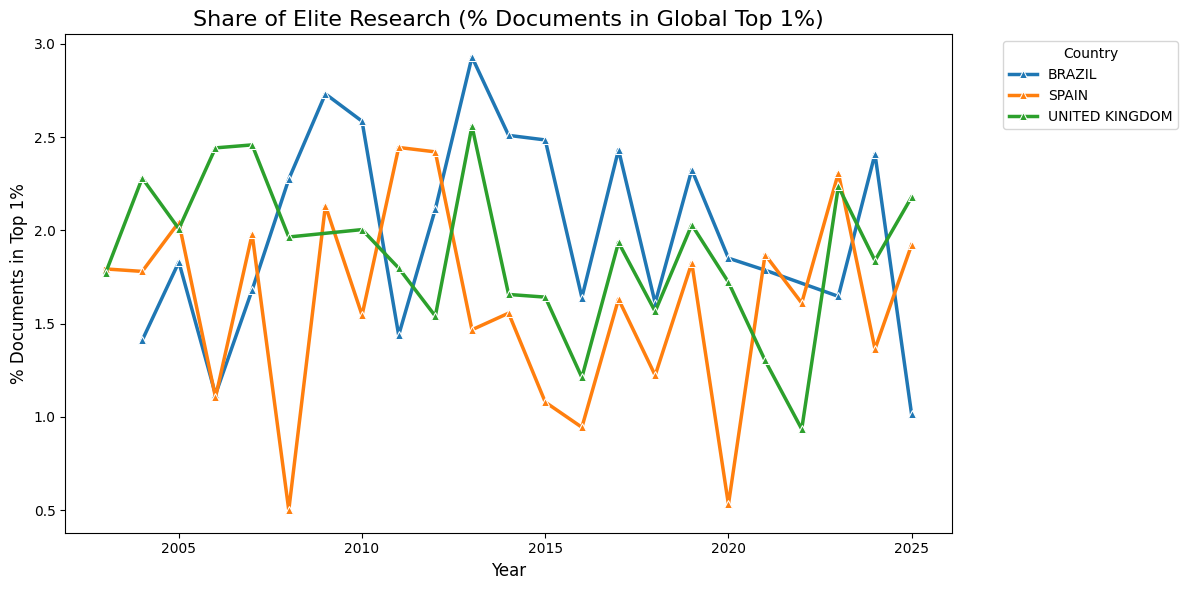

In [19]:
#Rise of Elite Research (% Top 1%) ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='year', y='Avg Top 1%', hue='Name', marker='^', linewidth=2.5)
plt.title('Share of Elite Research (% Documents in Global Top 1%)', fontsize=16)
plt.ylabel('% Documents in Top 1%', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.tight_layout()
plt.show()

# Comparative Analysis

C:\Users\lalup\AppData\Local\Temp\ipykernel_15544\1977548701.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overall_df = df.groupby('Name').apply(overall_weighted_agg).reset_index()
C:\Users\lalup\AppData\Local\Temp\ipykernel_15544\1977548701.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vol, x='Total Documents', y='Name', palette='Blues_d', ax=axes[0])
C:\Users\lalup\AppData\Local\Temp\ipykernel_15544\1977548701.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

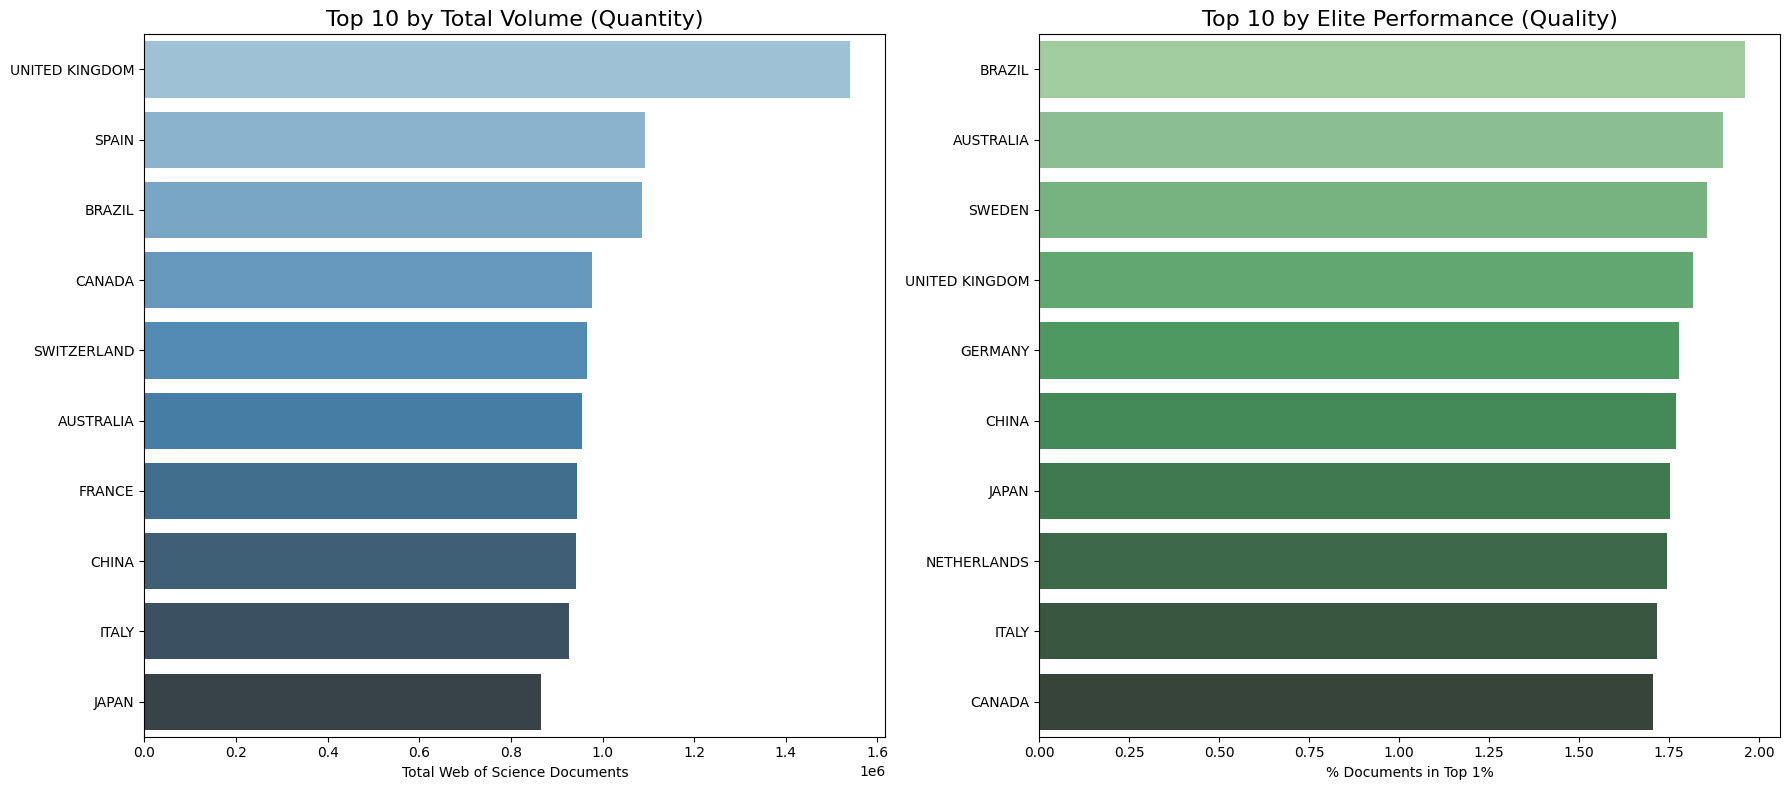

In [20]:
def overall_weighted_agg(x):
    total_docs = x['Web of Science Documents'].sum()
    avg_top1 = np.average(x['% Documents in Top 1%'], weights=x['Web of Science Documents'])
    
    return pd.Series({
        'Total Documents': total_docs,
        'Avg Top 1%': avg_top1
    })

overall_df = df.groupby('Name').apply(overall_weighted_agg).reset_index()

#Growth Analysis (Year-over-Year)
yearly_agg = df.groupby(['Name', 'year'])['Web of Science Documents'].sum().reset_index()
yearly_agg.sort_values(['Name', 'year'], inplace=True)
# Calculate percentage change
yearly_agg['Growth Rate'] = yearly_agg.groupby('Name')['Web of Science Documents'].pct_change() * 100
# Calculate average annual growth rate
avg_growth = yearly_agg.groupby('Name')['Growth Rate'].mean().reset_index().sort_values('Growth Rate', ascending=False).head(10)


#The Leaderboards (Volume vs. Efficiency) ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

#Volume Leaders
top_vol = overall_df.sort_values('Total Documents', ascending=False).head(10)
sns.barplot(data=top_vol, x='Total Documents', y='Name', palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 10 by Total Volume (Quantity)', fontsize=16)
axes[0].set_xlabel('Total Web of Science Documents')
axes[0].set_ylabel('')

#Efficiency Leaders
top_eff = overall_df.sort_values('Avg Top 1%', ascending=False).head(10)
sns.barplot(data=top_eff, x='Avg Top 1%', y='Name', palette='Greens_d', ax=axes[1])
axes[1].set_title('Top 10 by Elite Performance (Quality)', fontsize=16)
axes[1].set_xlabel('% Documents in Top 1%')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


C:\Users\lalup\AppData\Local\Temp\ipykernel_15544\2538573760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_growth, x='Growth Rate', y='Name', palette='Reds_d')


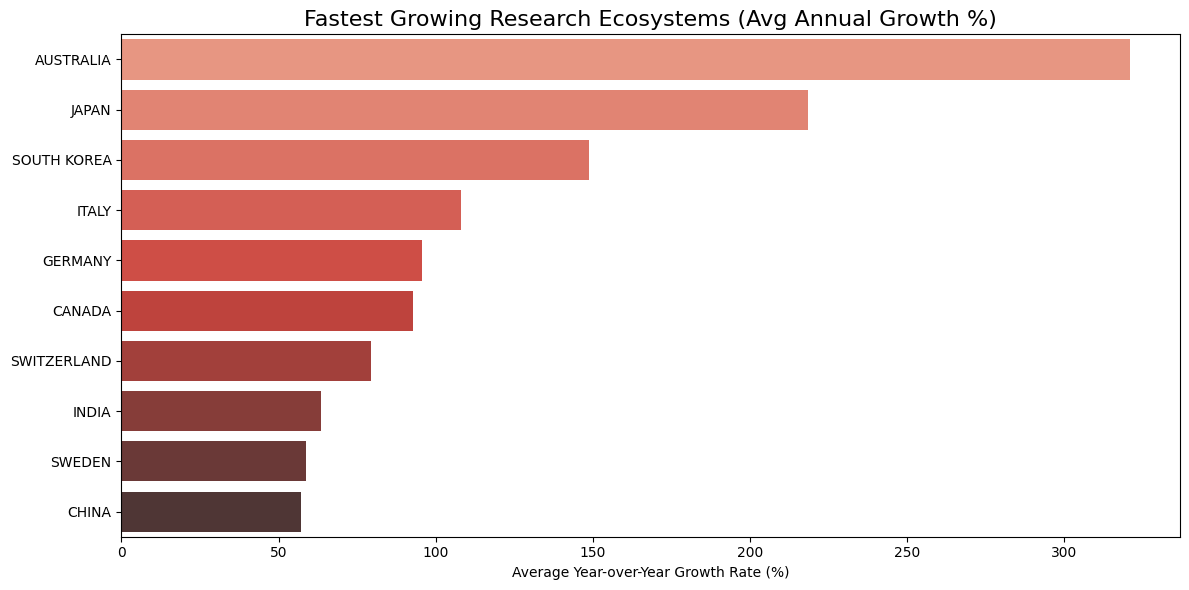

In [21]:

#The Fast Movers (Growth)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_growth, x='Growth Rate', y='Name', palette='Reds_d')
plt.title('Fastest Growing Research Ecosystems (Avg Annual Growth %)', fontsize=16)
plt.xlabel('Average Year-over-Year Growth Rate (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Anomaly Detection

C:\Users\lalup\AppData\Local\Temp\ipykernel_15544\898356107.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profile_df = df.groupby('Name').apply(weighted_agg).reset_index()


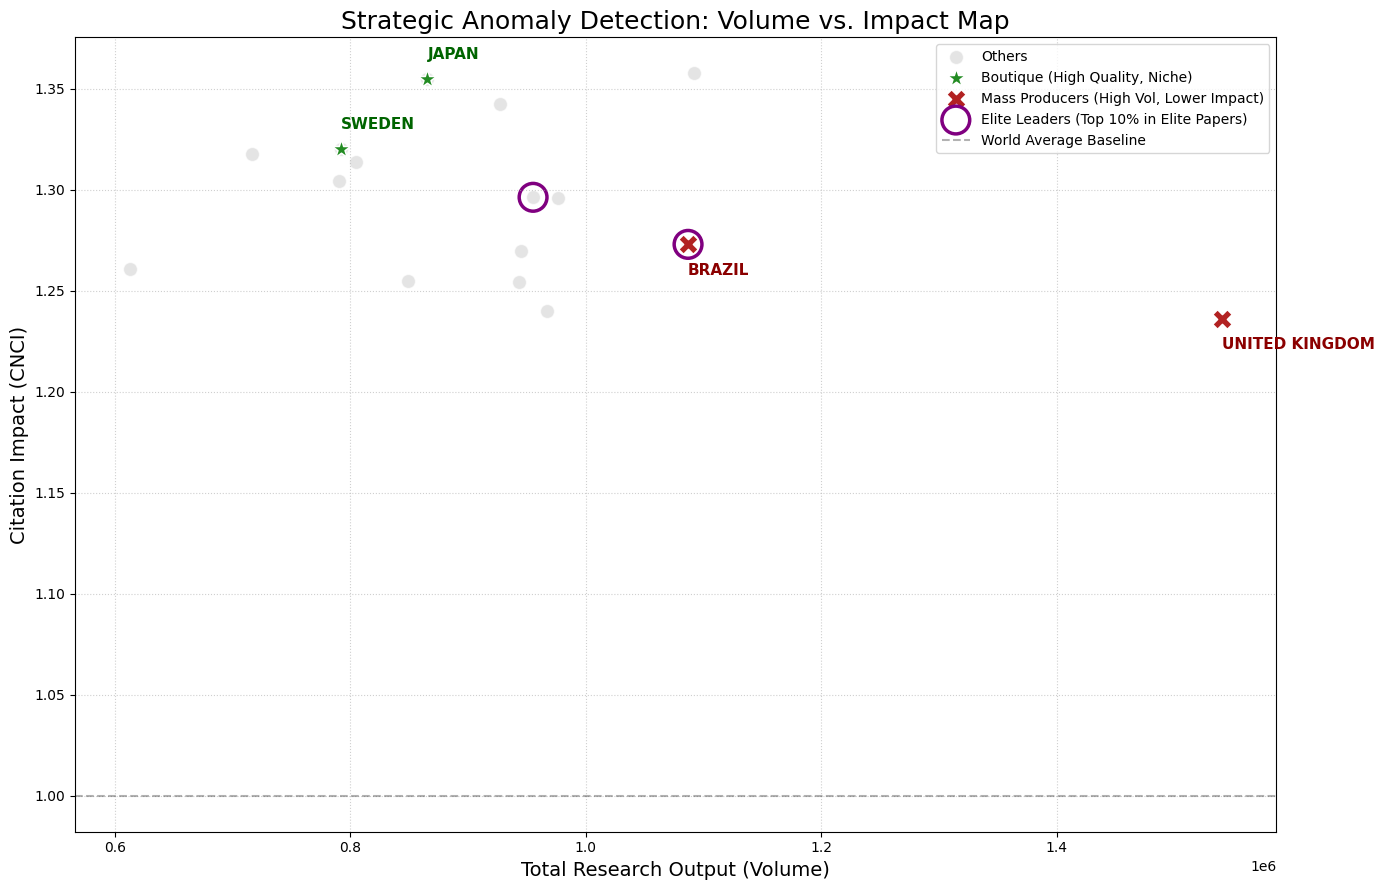

In [22]:
profile_df = df.groupby('Name').apply(weighted_agg).reset_index()

def weighted_agg(x):
    total_docs = x['Web of Science Documents'].sum()
    avg_cnci = np.average(x['Category Normalized Citation Impact'], weights=x['Web of Science Documents'])
    avg_top1 = np.average(x['% Documents in Top 1%'], weights=x['Web of Science Documents'])
    
    return pd.Series({
        'Web of Science Documents': total_docs,
        'Avg CNCI': avg_cnci,
        'Avg Top 1%': avg_top1
    })
# We use quantiles to dynamically identify the outliers relative to the dataset
vol_low_thresh = profile_df['Web of Science Documents'].quantile(0.40)   # Bottom 40% in Volume
vol_high_thresh = profile_df['Web of Science Documents'].quantile(0.75)  # Top 25% in Volume
qual_high_thresh = profile_df['Avg CNCI'].quantile(0.75)        # Top 25% in Quality
qual_low_thresh = profile_df['Avg CNCI'].quantile(0.40)         # Bottom 40% in Quality

# Boutique: Small but Mighty
boutique = profile_df[
    (profile_df['Web of Science Documents'] <= vol_low_thresh) & 
    (profile_df['Avg CNCI'] >= qual_high_thresh)
]

# Mass Producers: Big but Diluted
mass_producers = profile_df[
    (profile_df['Web of Science Documents'] >= vol_high_thresh) & 
    (profile_df['Avg CNCI'] <= qual_low_thresh)
]

# Elite Leaders: The 1% Factories
elite_thresh = profile_df['Avg Top 1%'].quantile(0.90) # Top 10% of countries
elite = profile_df[profile_df['Avg Top 1%'] >= elite_thresh]

plt.figure(figsize=(14, 9))
sns.scatterplot(data=profile_df, x='Web of Science Documents', y='Avg CNCI', color='lightgrey', s=100, label='Others', alpha=0.6)
# Highlight Boutique
if not boutique.empty:
    sns.scatterplot(data=boutique, x='Web of Science Documents', y='Avg CNCI', color='forestgreen', s=200, marker='*', label='Boutique (High Quality, Niche)')
    for _, row in boutique.iterrows():
        plt.text(row['Web of Science Documents'], row['Avg CNCI']+0.01, row['Name'], color='darkgreen', fontsize=11, weight='bold')

# Highlight Mass Producers
if not mass_producers.empty:
    sns.scatterplot(data=mass_producers, x='Web of Science Documents', y='Avg CNCI', color='firebrick', s=200, marker='X', label='Mass Producers (High Vol, Lower Impact)')
    for _, row in mass_producers.iterrows():
        plt.text(row['Web of Science Documents'], row['Avg CNCI']-0.015, row['Name'], color='darkred', fontsize=11, weight='bold')

# Highlight Elite (Circle overlay)
if not elite.empty:
    plt.scatter(elite['Web of Science Documents'], elite['Avg CNCI'], s=400, facecolors='none', edgecolors='purple', linewidth=2.5, label='Elite Leaders (Top 10% in Elite Papers)')

plt.title('Strategic Anomaly Detection: Volume vs. Impact Map', fontsize=18)
plt.xlabel('Total Research Output (Volume)', fontsize=14)
plt.ylabel('Citation Impact (CNCI)', fontsize=14)
plt.axhline(1.0, color='black', linestyle='--', alpha=0.3, label='World Average Baseline')
plt.legend(loc='upper right', frameon=True)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()